## First import all libraries

In [3]:
import pandas as pd
import numpy as np
import random
import json
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from collections import Counter
import seaborn as sns
from matplotlib import rcParams

## Let's open the file and read it

In [7]:
file = open('trending.json',encoding="utf8")
raw_data = json.load(file)
trending_videos_list = raw_data['collector']
df_tiktok_dataset = pd.DataFrame(trending_videos_list)
df_tiktok_dataset.head()

,id,text,createTime,authorMeta,musicMeta,covers,webVideoUrl,videoUrl,videoUrlNoWaterMark,videoMeta,diggCount,shareCount,playCount,commentCount,downloaded,mentions,hashtags
0,6907228749016714497,Confidence went 📈,1608214517,"{'id': '6825540583826768902', 'secUid': 'MS4wL...","{'musicId': '6790057285814061057', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@ninakleij/video/690722...,https://v77.tiktokcdn.com/ed1f811617d7b5e18b8d...,,"{'height': 1024, 'width': 576, 'duration': 15}",3710,50,44800,68,True,[],[]
1,6875468410612993286,Quiet Zone... follow me on insta: joeysofo. Co...,1600819763,"{'id': '6729292817489986566', 'secUid': 'MS4wL...","{'musicId': '6678927595137977094', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@joeysofo/video/6875468...,https://v77.tiktokcdn.com/ab935f1975cb8b69aebf...,,"{'height': 1024, 'width': 576, 'duration': 11}",55700,1817,838100,936,True,[@dwight_schnuute],[]
2,6898699405898059010,Iphone bend test🤗 #tiktok #viral #fyp #iphone ...,1606228625,"{'id': '6791901371429913601', 'secUid': 'MS4wL...","{'musicId': '6881287666340481026', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@jackeyephone/video/689...,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,"{'height': 960, 'width': 540, 'duration': 19}",936200,21100,15300000,27100,True,[],"[{'id': '23428', 'name': 'tiktok', 'title': ''..."
3,6902819837345533186,,1607187987,"{'id': '6574079584262094854', 'secUid': 'MS4wL...","{'musicId': '6881107586830076678', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@naomivaneeren/video/69...,https://v21.tiktokcdn.com/video/tos/alisg/tos-...,,"{'height': 1024, 'width': 576, 'duration': 13}",12900,197,94900,143,True,[],[]
4,6905635666588192002,小技です👟✨#tiktok教室#tutorial,1607843600,"{'id': '6586854399372394498', 'secUid': 'MS4wL...","{'musicId': '6649693417590754053', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@io.dreamer_mk/video/69...,https://v77.tiktokcdn.com/7622979a5ceb97c6da4e...,,"{'height': 1024, 'width': 576, 'duration': 22}",8805,198,115300,52,True,[],"[{'id': '1627704798586882', 'name': 'tiktok教室'..."


Each cell contains a dictionary. Let's get  more familar by opening the cell with info about the author of first video

In [8]:
a=df_tiktok_dataset.loc[0,'authorMeta']
a

{'id': '6825540583826768902',
 'secUid': 'MS4wLjABAAAA1FfFjRMUzr0hX2YPT7pRr7bCPQWa-kU_kVo3HLghB9xPQsjgNl0iIxCKKV7BO-4f',
 'name': 'ninakleij',
 'nickName': 'Nina',
 'verified': False,
 'signature': 'don’t tell my instagram I’m here\n19 👸🏼',
 'avatar': 'https://p16-sign-sg.tiktokcdn.com/aweme/1080x1080/tos-alisg-avt-0068/bf750c969d404f541623e9e7d697b873.jpeg?x-expires=1608649200&x-signature=vWwNAWq%2BLTZ0rSaqn34kKJblJ4A%3D'}

## Now lets 'open' those cells and add them in extra columns. Then, drop duplicates.

In [9]:
# Let's expand the hashtag cell containing lists to multiple rows
df_tiktok_dataset = df_tiktok_dataset.explode('hashtags').explode('mentions')
def object_to_columns(dfRow, **kwargs):
    '''Function to expand cells containing dictionaries, to columns'''
    for column, prefix in kwargs.items():
        if isinstance(dfRow[column], dict):
            for key, value in dfRow[column].items():
                columnName = '{}.{}'.format(prefix, key)
                dfRow[columnName] = value
    return dfRow

# Expand certain cells containing dictionaries to columns
df_tiktok_dataset = df_tiktok_dataset.apply(object_to_columns, 
                            authorMeta='authorMeta',  
                            musicMeta='musicMeta',
                            covers='cover',
                            videoMeta='videoMeta',
                            hashtags='hashtag', axis = 1)

# Remove the original columns containing the dictionaries
df_tiktok_dataset = df_tiktok_dataset.drop(['authorMeta','musicMeta','covers','videoMeta','hashtags'], axis = 1)

### For 1000 unique videos there are 907 unique songs and 802 unique authors.

In [10]:
df_unique_videos = df_tiktok_dataset.drop_duplicates(subset='id', keep="first")
df_unique_music = df_tiktok_dataset.drop_duplicates(subset='musicMeta.musicId', keep="first")
df_unique_authors = df_tiktok_dataset.drop_duplicates(subset='authorMeta.id', keep="first")

# Show amount of rows per dataset
{
    
    'df_tiktok_dataset': df_tiktok_dataset.shape,
    'df_unique_videos': df_unique_videos.shape,
    'df_unique_music': df_unique_music.shape,
    'df_unique_authors': df_unique_authors.shape
}

{'df_tiktok_dataset': (5693, 37),
 'df_unique_videos': (1000, 37),
 'df_unique_music': (907, 37),
 'df_unique_authors': (802, 37)}

## Modify the df adding new columns

Convert timestamp to the datetime

In [11]:
# extracting date from timestamp
df_unique_videos['Datetime'] = [datetime.fromtimestamp(d) for d in df_unique_videos['createTime']] 
df_unique_videos['Date']=[d.date() for d in df_unique_videos['Datetime']] 
df_unique_videos['Time']=[d.time() for d in df_unique_videos['Datetime']] 

/var/folders/cd/yw_s8tkx7wb7fs3fj7mll3zm0000gn/T/ipykernel_11623/4181192439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_videos['Datetime'] = [datetime.fromtimestamp(d) for d in df_unique_videos['createTime']]
/var/folders/cd/yw_s8tkx7wb7fs3fj7mll3zm0000gn/T/ipykernel_11623/4181192439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_videos['Date']=[d.date() for d in df_unique_videos['Datetime']]
/var/folders/cd/yw_s8tkx7wb7fs3fj7mll3zm0000gn/T/ipykernel_11623/4181192439.py:4: S

Identify indexes of some columns to easily navigate and DF slicing and add new columns 'text_len' and 'hashtag_len'

In [12]:
df_unique_videos['text_len']=0
df_unique_videos['hashtag_len']=0
index_playcount=list(df_unique_videos.columns).index('playCount')
index_text=list(df_unique_videos.columns).index('text')
index_text_len=list(df_unique_videos.columns).index('text_len')
index_hashtag_len=list(df_unique_videos.columns).index('hashtag_len')

/var/folders/cd/yw_s8tkx7wb7fs3fj7mll3zm0000gn/T/ipykernel_11623/2543055346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_videos['text_len']=0
/var/folders/cd/yw_s8tkx7wb7fs3fj7mll3zm0000gn/T/ipykernel_11623/2543055346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_videos['hashtag_len']=0


Let's add columns 'text_len' and 'hashtag_len'

In [13]:
i=0
for txt in df_unique_videos['text']:
    i+=1
    if isinstance(txt, str):
        a=txt.split()
    df_unique_videos.iloc[i-1,index_text_len]=len(a)
i=0
for txt in df_unique_videos['text']:
    if isinstance(txt, str):
        a=txt.split()
    i+=1
    words=[]
    for word in a:
        if word.startswith('#'):
            word=word.replace('#','')
            words.append(word.lower())
    df_unique_videos.iloc[i-1,index_hashtag_len]=len(words)

/Users/tianahawasly/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


## Hashtags analysis

### Divide videos into 3 categories based on popularity

A: super-popular videos (2.8M+ plays)

B: popular videos (between 196k and 2.8M plays)

C: moderately popular videos (below 196K plays)

In [14]:
# Group hashtags based on appearance in videos of different popularity levels

popular_hashtags_A=[]
popular_hashtags_B=[]
popular_hashtags_C=[]
popular_hashtags=[]
i=0
for txt in df_unique_videos['text']:
    if isinstance(txt, str):
        a=txt.split()
    i+=1
    for word in a:
        if word.startswith('#'):
            #print(word)
            word=word.replace('#','')
            words.append(word.lower())
            popular_hashtags.append(word.lower())
            if df_unique_videos.iloc[i-1,index_playcount]>=2800000:
                popular_hashtags_A.append(word.lower())
            elif df_unique_videos.iloc[i-1,index_playcount]<2800000 and df_unique_videos.iloc[i-1,index_playcount]>=196900:
                popular_hashtags_B.append(word.lower())
            elif df_unique_videos.iloc[i-1,index_playcount]<196900:
                popular_hashtags_C.append(word.lower())           
            
        else:
            continue
print(len(popular_hashtags))
print(len(popular_hashtags_A))
print(len(popular_hashtags_B))
print(len(popular_hashtags_C))

5201
159
1144
3898


In [15]:
hashtags=[]
hashtags_A=[]
hashtags_B=[]
hashtags_C=[]
k=0
for txt in df_unique_videos['hashtag.name']:
    k+=1
    if str(txt)!='nan':
        c=txt.split()
        for wor in c:
            hashtags.append(wor.lower())  
            if df_unique_videos.iloc[k-1,index_playcount]>2800000:
                hashtags_A.append(wor.lower())
            elif df_unique_videos.iloc[k-1,index_playcount]<2800000 and df_unique_videos.iloc[k-1,index_playcount]>=196900:
                hashtags_B.append(wor.lower())
            elif df_unique_videos.iloc[k-1,index_playcount]<196900:
                hashtags_C.append(wor.lower())
    else:
        continue
print(len(hashtags))
print(len(hashtags_A))
print(len(hashtags_B))
print(len(hashtags_C))

853
31
195
624


In [16]:
# Consolidate hashtags from two separate lists: 'hashtags' and 'text' columns
popular_hashtags_A.extend(hashtags_A)
popular_hashtags_B.extend(hashtags_B)
popular_hashtags_C.extend(hashtags_C)
popular_hashtags.extend(hashtags)

In [17]:
print(len(popular_hashtags))
print(len(popular_hashtags_A))
print(len(popular_hashtags_B))
print(len(popular_hashtags_C))

6054
190
1339
4522


In [18]:
# Get hashtag frequency of appearance in videos
def count_hashtags(list_words):
    df=pd.DataFrame({'Hashtag':[],'Counts':[]})
    counts=dict()
    for word in list_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    df.Hashtag=counts.keys()
    df.Counts=counts.values()
    return df

In [19]:
counts_A=count_hashtags(popular_hashtags_A)
counts_A=counts_A.sort_values(by=['Counts'],ascending=False)
counts_B=count_hashtags(popular_hashtags_B)
counts_B=counts_B.sort_values(by=['Counts'],ascending=False)
counts_C=count_hashtags(popular_hashtags_C)
counts_C=counts_C.sort_values(by=['Counts'],ascending=False)
counts_all=count_hashtags(popular_hashtags)
counts_all=counts_C.sort_values(by=['Counts'],ascending=False)

In [20]:
counts_all

,Hashtag,Counts
18,fyp,397
17,foryou,237
19,foryoupage,162
20,fy,100
42,fitness,78
...,...,...
1636,inclusion,1
1637,2prettybestfriends,1
1638,csmajorsoftiktok,1
8,beniöneçıkart,1


In [21]:
hashtagCount=counts_all.reset_index(drop = True)

In [22]:
hashtagCount

,Hashtag,Counts
0,fyp,397
1,foryou,237
2,foryoupage,162
3,fy,100
4,fitness,78
...,...,...
1697,inclusion,1
1698,2prettybestfriends,1
1699,csmajorsoftiktok,1
1700,beniöneçıkart,1


## Hashtags distribution graph

/var/folders/cd/yw_s8tkx7wb7fs3fj7mll3zm0000gn/T/ipykernel_11623/180396473.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=70, horizontalalignment= 'right',fontsize=12,
/Users/tianahawasly/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tianahawasly/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 12471 missing from current font.
  font.set_text(s, 0, flags=flags)


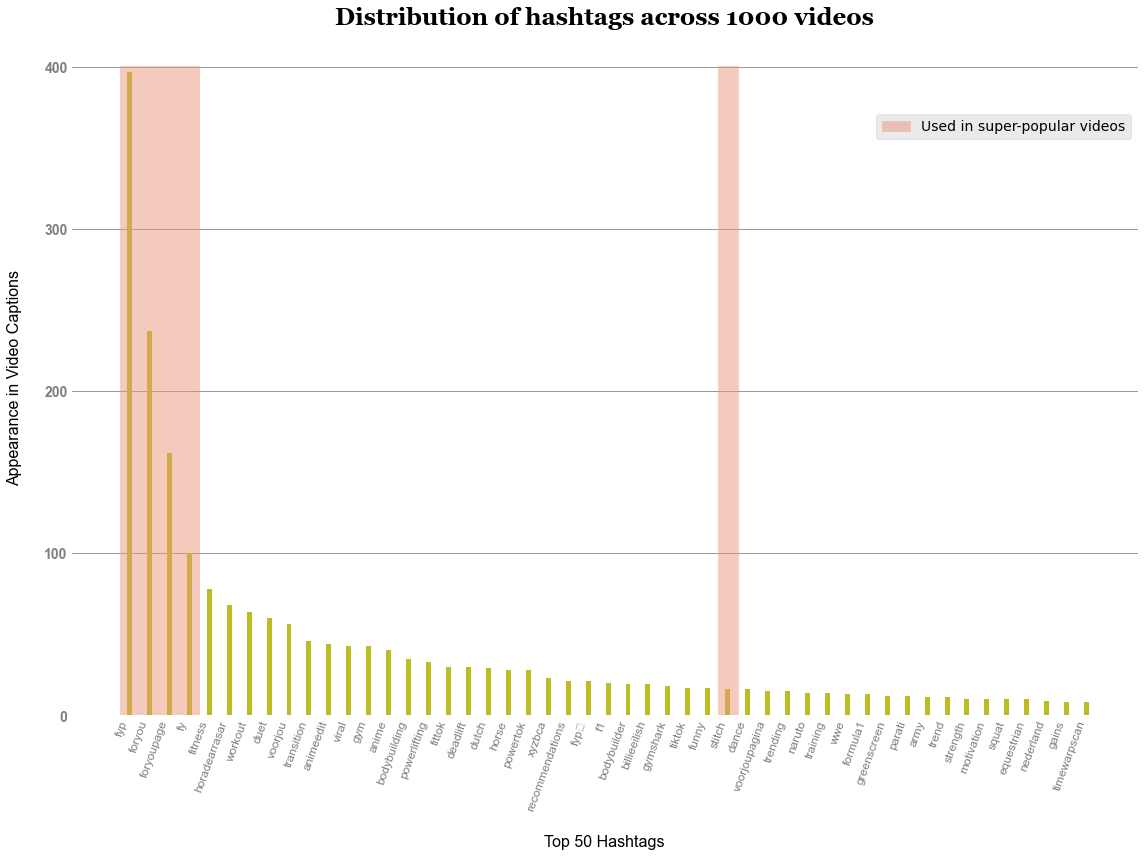

In [23]:
## Hashtag distribution
plt.style.use('ggplot')
fig = plt.figure(figsize= (16,12))
ax = fig.add_subplot(111)
top_hc = hashtagCount.iloc[0:49,1]
top_hw = hashtagCount.iloc[0:49,0]
x = top_hw
y = top_hc
ax.bar(x,y, width=.25, color='tab:olive')
yticks=ax.set_yticks(np.arange(0,500,100))
ax.set_yticklabels(np.arange(0,500,100), fontsize=14,fontname='Arial', c='tab:gray', weight='bold')
ax.set_xticklabels(x, rotation=70, horizontalalignment= 'right',fontsize=12,
                  fontname='Arial', c='tab:gray')

## To highlight most popular hashtags section
plt.axvspan(-.5,3.5,ymax=0.96, color='darksalmon', alpha=0.5, label='Used in super-popular videos')
plt.axvspan(29.5,30.5,ymax=0.96, color='darksalmon', alpha=0.5)
ax.legend(loc='upper right',  bbox_to_anchor=(1, 0.9), fontsize=14)

ax.set_facecolor('white')
plt.title('Distribution of hashtags across 1000 videos', fontname='Georgia',fontsize=24,c='black',weight='bold',pad=15)
ax.set_xlabel('Top 50 Hashtags',fontname='Arial',fontsize=16,c='black',labelpad=22)
ax.set_ylabel('Appearance in Video Captions',fontname='Arial',fontsize=16,c='black',labelpad=22)
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=0)
ax.grid(axis='y', c='grey')
plt.tight_layout()
fig.savefig('hashtag.jpg')

##  Radar Chart for metrics of popularity

/Users/tianahawasly/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/tianahawasly/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/tianahawasly/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set

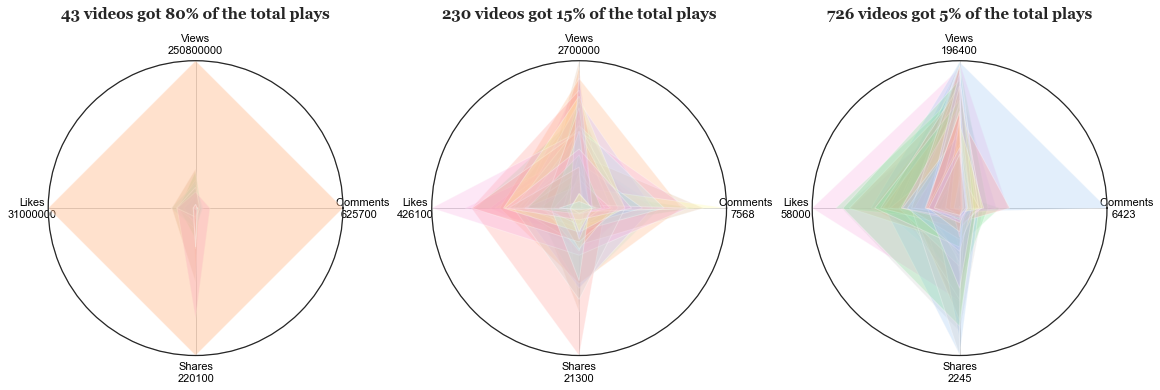

In [35]:
from math import pi
from sklearn import preprocessing
import seaborn as sns

sns.set_theme(style="white", palette="pastel")

df=df_unique_videos.copy()
categories = ['commentCount', 'playCount', 'diggCount','shareCount']
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
df_A=df[df['playCount']>=2800000]
df_B=df[(df['playCount']>=196900) & (df['playCount']<2800000)]
df_C=df[(df['playCount']<196900)]
df_a=df_A.copy()
df_b=df_B.copy()
df_c=df_C.copy()
min_max_scaler = preprocessing.MinMaxScaler()
df_A[categories] = min_max_scaler. fit_transform(df_A[categories])
df_B[categories] = min_max_scaler. fit_transform(df_B[categories])
df_C[categories] = min_max_scaler. fit_transform(df_C[categories])
#Plot graphs
fig=plt.figure(figsize=(16,12),constrained_layout=True, facecolor='white')
ax = plt.subplot(131, polar=True)
ax1 = plt.subplot(132, polar=True)
ax2 = plt.subplot(133, polar=True)
for i in df_A.index:
    values = df_A.loc[i, categories]
    values=list(values)
    values += values[:1]
    
    ax.set_ylim(0, 1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['  '+'Comments\n'+str(np.max(df['commentCount'])),'Views\n'+str(np.max(df['playCount'])) , 'Likes\n'+str(np.max(df['diggCount'])),'Shares\n'+str(np.max(df['shareCount']))],
                      fontname='Arial',
                        color='black',
                        size=11)
    ax.set_yticks([1])
    ax.set_title('43 videos got 80% of the total plays', fontname='Georgia',weight='bold', fontsize=15, pad=15)
    ax.set_yticklabels([])
    
    # Fill area
    ax.fill(angles, values, alpha=0.4)
for i in df_B.index:
    values = df_B.loc[i, categories]
    values=list(values)
    values += values[:1]
   
    ax1.set_ylim(0, 1)
    ax1.set_xticks(angles[:-1])
    ax1.set_xticklabels(['  '+'Comments\n'+str(np.max(df_b['commentCount'])),'Views\n'+str(np.max(df_b['playCount'])) , 'Likes\n'+str(np.max(df_b['diggCount'])),'Shares\n'+str(np.max(df_b['shareCount']))], 
                        fontname='Arial',
                        color='black',
                        size=11)
    ax1.set_yticks([1])
    ax1.set_yticklabels([])
    
    # Fill area
    ax1.fill(angles, values, alpha=0.3)
    ax1.set_title('230 videos got 15% of the total plays',fontname='Georgia',weight='bold',fontsize=15, pad=15)
for i in df_C.index:
    values = df_C.loc[i, categories]
    values=list(values)
    values += values[:1]
    ax2.set_ylim(0, 1)
    ax2.set_xticks(angles[:-1])
    ax2.set_xticklabels(['  '+'Comments\n'+str(np.max(df_c['commentCount'])),'Views\n'+str(np.max(df_c['playCount'])) , 'Likes\n'+str(np.max(df_c['diggCount'])),
                         'Shares\n'+str(np.max(df_c['shareCount']))],
                        fontname='Arial',
                        color='black',
                        size=11 )
    ax2.set_yticks([1])
    ax2.set_yticklabels([])
   
    # Fill area
    ax2.fill(angles, values, alpha=0.3)
    ax2.set_title('726 videos got 5% of the total plays', fontname='Georgia', weight='bold', fontsize=15, pad=15)
# Show the graph
plt.show()
fig.savefig('radar_MTP.jpg')


## 4D Scatterplot

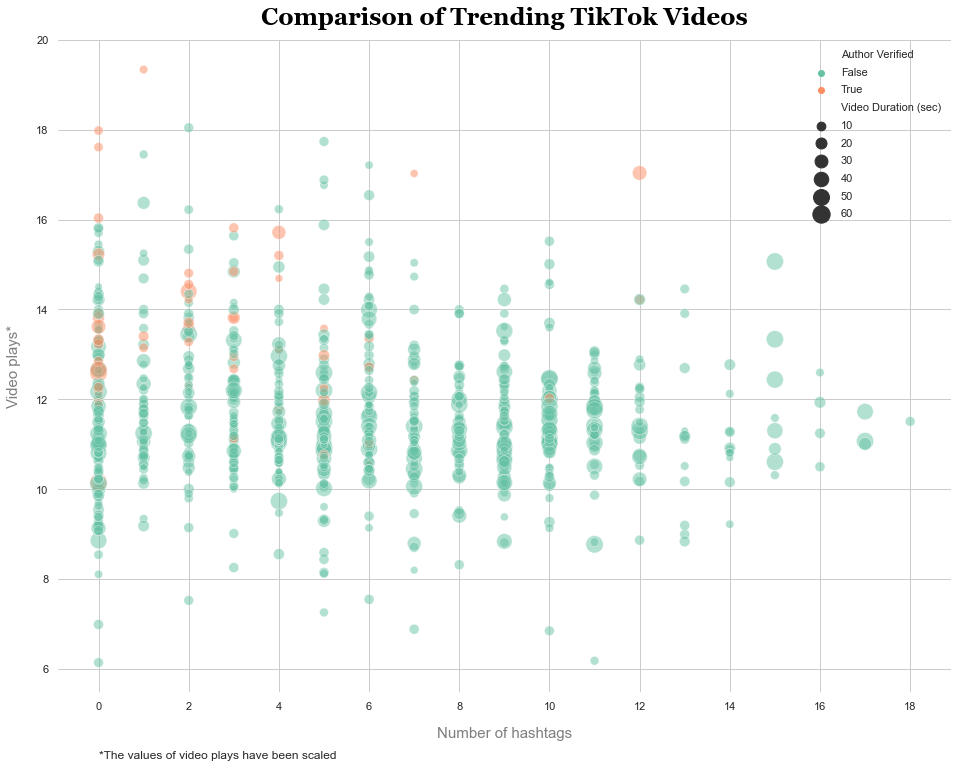

In [25]:
df_unique_videos4 = df_unique_videos.rename(columns={'authorMeta.verified': 'Author Verified', 'videoMeta.duration': 'Video Duration (sec)'})

sns.set_theme(style="white", palette="Set2")
fig = plt.figure(figsize=(16,12))
ax4 = sns.scatterplot(data=df_unique_videos4,y=np.log(df_unique_videos4.playCount),x='hashtag_len',
hue=df_unique_videos4['Author Verified'],size='Video Duration (sec)',sizes=(50,300),alpha=0.5)
ax4.set_title('Comparison of Trending TikTok Videos',fontsize=24,c='black',weight='bold',pad=15, fontname='Georgia')
sns.despine(top=True,bottom=True,left=True,right=True)
ax4.set_xlabel('Number of hashtags', labelpad=15, fontsize=15, fontname='Arial', c='tab:gray')
ax4.set_ylabel('Video plays*', labelpad=15, fontsize=15, fontname='Arial', c='tab:gray')
ax4.set_xticks(np.arange(0,20,2))
ax4.grid()
plt.legend(scatterpoints=1, frameon=False, labelspacing=0.7)
ax4.text(x=0, y=4, s='*The values of video plays have been scaled')
plt.show()
fig.savefig('4D chart.jpg')